In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('sales.csv', encoding = "unicode_escape")

In [ ]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [ ]:
df.isnull().sum()

,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
STATUS,0
QTR_ID,0
MONTH_ID,0
YEAR_ID,0


In [ ]:
df2 = df[['SALES', 'QUANTITYORDERED', 'PRICEEACH']]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df2scaler = scaler.fit_transform(df2)

<ipython-input-10-bcef5bf5eb64>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(K, array, 'bo-', color = 'red')


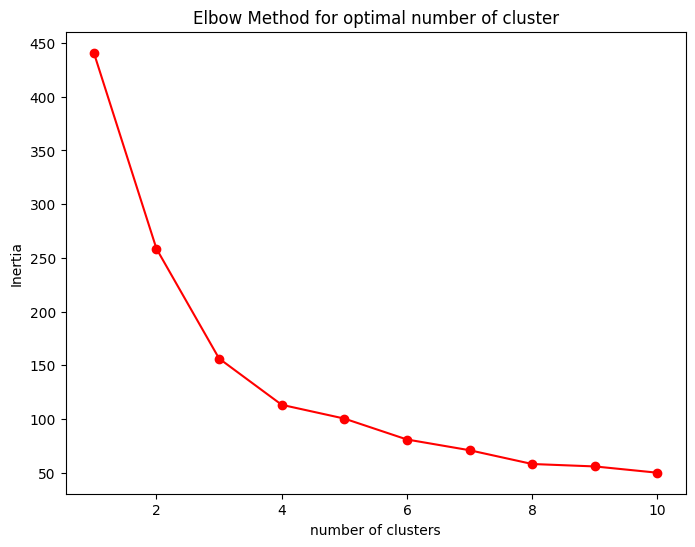

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
array = []
K = range(1, 11)
for k in K:
    model = KMeans(n_clusters = k, random_state = 42)
    model.fit(df2scaler)
    array.append(model.inertia_)
plt.figure(figsize = (8, 6))
plt.plot(K, array, 'bo-', color = 'red')
plt.xlabel('number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for optimal number of cluster')
plt.show()

In [ ]:
optimal = 3
model = KMeans(n_clusters = optimal, random_state = 42)

df2['CLUSTER'] = model.fit_predict(df2scaler)
print(df2[['SALES', 'QUANTITYORDERED', 'PRICEEACH', 'CLUSTER']])

        SALES  QUANTITYORDERED  PRICEEACH  CLUSTER
10    3965.66               37     100.00        2
21    1451.00               20      72.55        0
40    4905.39               21     100.00        2
47    3944.70               30     100.00        2
51    2416.56               24     100.00        2
...       ...              ...        ...      ...
2667  3268.00               43      76.00        0
2673  1747.20               26      67.20        0
2685  5001.92               44     100.00        1
2764  4277.35               35     100.00        2
2791  2189.60               23      95.20        2

[147 rows x 4 columns]


<ipython-input-13-e53dc4494ddf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['CLUSTER'] = model.fit_predict(df2scaler)
